In [130]:
import sys
sys.path.append('./include/')
import AtFtirAnalysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
raw = pd.read_pickle('../export/one_to_rule_them_all.p')

# get rid of time as index and convert time to integers
raw.reset_index(inplace=True)
raw.time = [int(time) for time in raw.time]

raw.head()

,time,date,name,3497.0,3495.0,3493.0,3491.0,3489.0,3487.0,3485.0,...,766.0,764.0,762.0,760.0,758.0,756.0,754.0,752.0,750.0,748.0
0,0,171017,RF Versuch Nr1,0.23281,0.24086,0.24302,0.24436,0.24847,0.25154,0.25650,...,0.25566,0.25694,0.25856,0.26019,0.26182,0.26381,0.26631,0.26919,0.27212,0.27479
1,1,171017,RF Versuch Nr1,0.23351,0.23452,0.23511,0.24268,0.25079,0.25364,0.25783,...,0.25700,0.25842,0.25996,0.26148,0.26315,0.26537,0.26806,0.27080,0.27353,0.27632
2,2,171017,RF Versuch Nr1,0.22799,0.24030,0.24846,0.25086,0.25349,0.25744,0.25993,...,0.25818,0.25977,0.26140,0.26290,0.26459,0.26677,0.26924,0.27184,0.27448,0.27710
3,3,171017,RF Versuch Nr1,0.23041,0.23643,0.24330,0.25101,0.25671,0.25553,0.25245,...,0.25952,0.26131,0.26310,0.26469,0.26632,0.26839,0.27089,0.27351,0.27617,0.27901
4,4,171017,RF Versuch Nr1,0.22812,0.23541,0.24052,0.24689,0.25268,0.25423,0.25606,...,0.26073,0.26243,0.26426,0.26599,0.26774,0.26990,0.27248,0.27529,0.27823,0.28109


In [295]:
ftir = AtFtirAnalysis.AtFtirAnalysis(raw)



ftir.emsc(reference = ['171113', '171114'], order=3)

# water vapor: 1700 until 1900
# interesting range: 1650 until 1700 without low pass filter
# amide 1 band: 1600 until 1700
# amide 2 band: ??
# amide 3 band: 1100 until 1500

# ? 1590 until 1700 models urea ?
# and 1400 until ~ 1590 separates blanks from refolds ?
ftir.take_slice(low=1600,high=1700)
#ftir.select(['171123'])

#ftir.normalize_std()
#ftir.savitzky_golay()
#ftir.gradient(order=2)
#ftir.low_pass_filter()
ftir.pca()



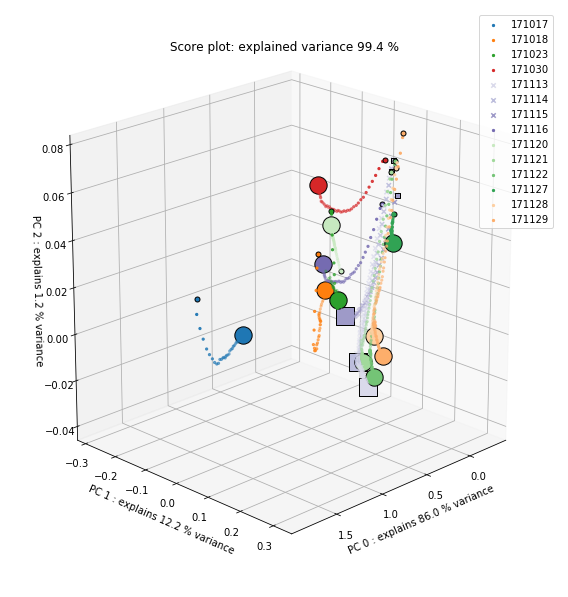

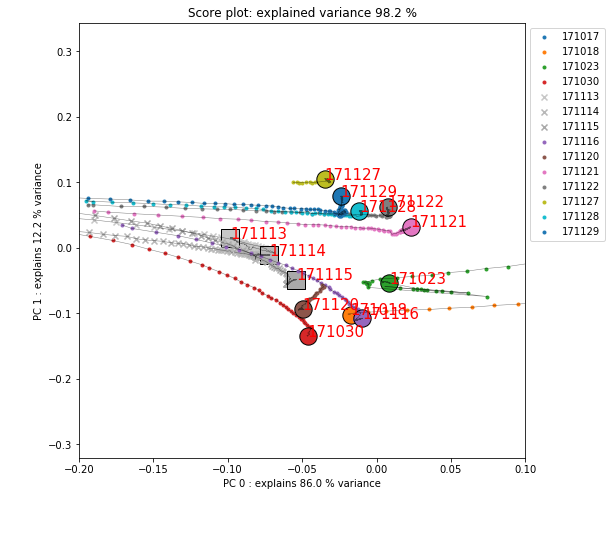

In [313]:
ax = ftir.plot_pca_3d()
ax = ftir.plot_pca(xlim=(-0.2, 0.1))
#plt.savefig('pca.png', dpi=360, layout='tight')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e5df11da0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1e5c2b65c0>], dtype=object)

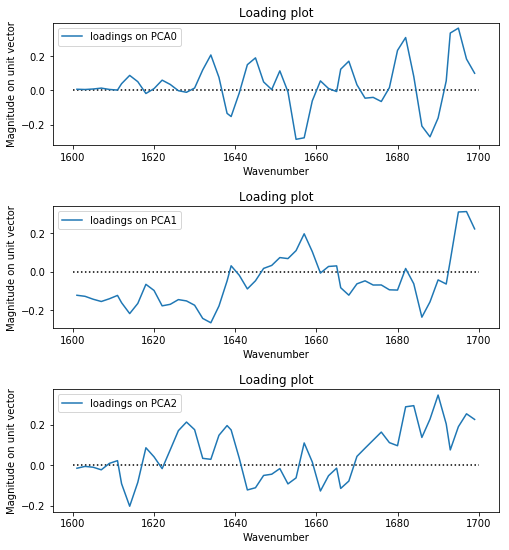

In [291]:
ftir.plot_pca_loadings()

/home/moritz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


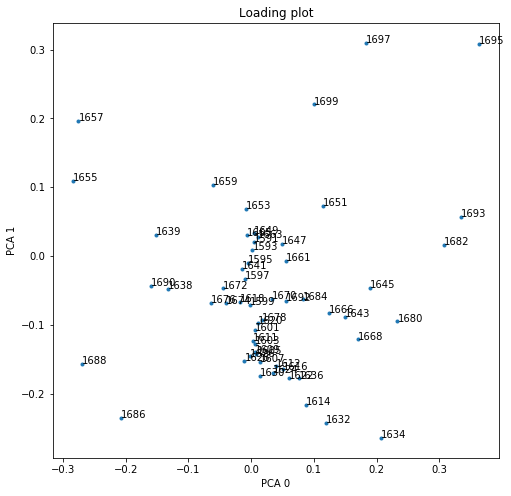

In [286]:
ftir.plot_pca_loadings_versus(p0=0, p1=1)

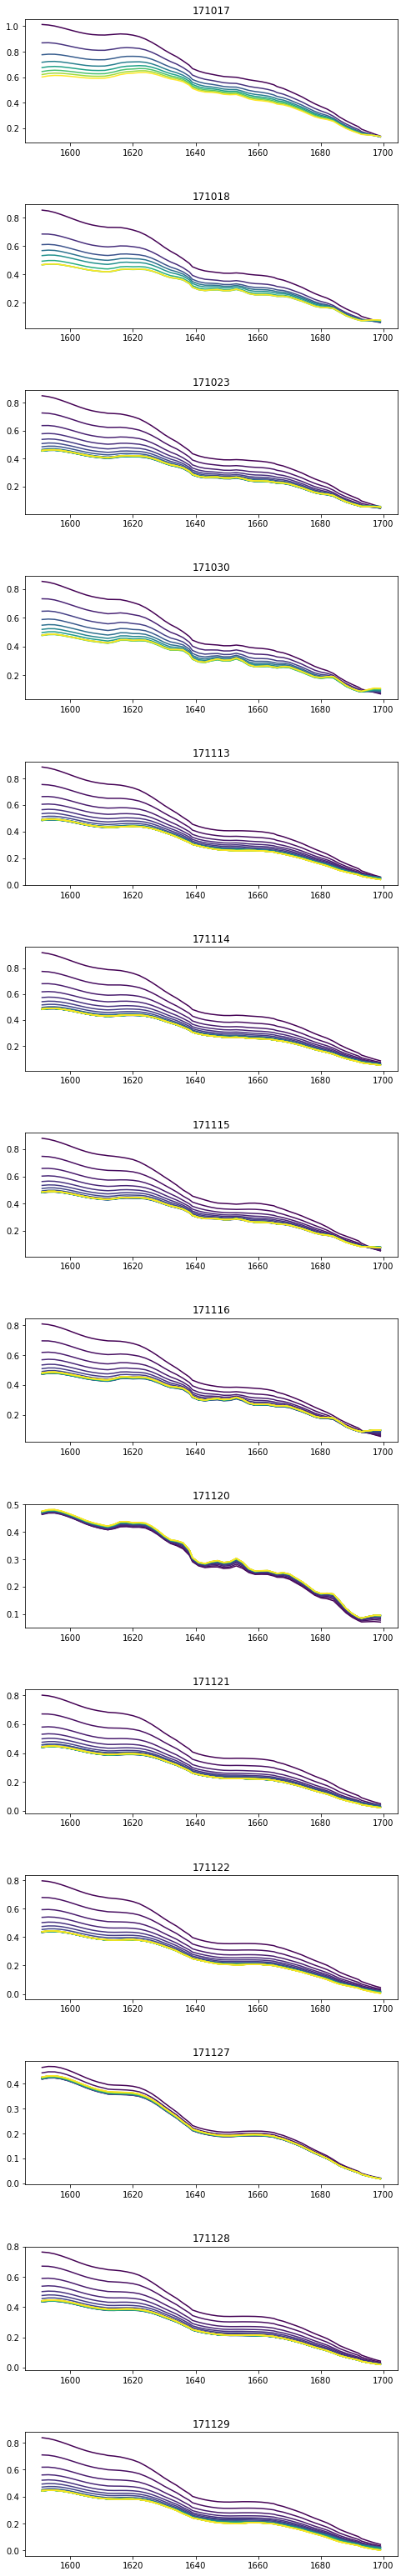

In [287]:
ax = ftir.plot_raw_spectra(step=5, as_analysis=1)
plt.savefig('spectra.png', dpi=120)

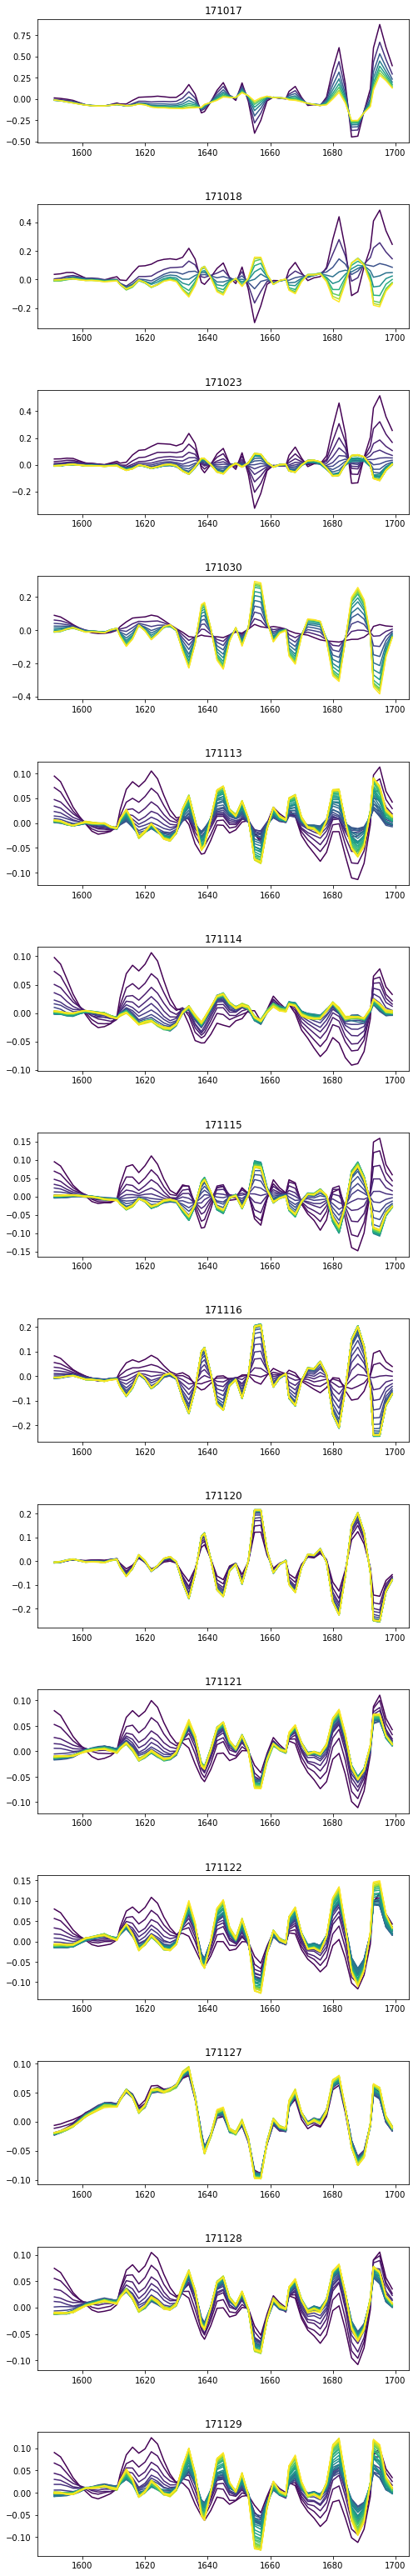

In [288]:
ftir.plot_processed_spectra(step=5, as_analysis=1)
plt.savefig('analyzed_spectra.png', dpi=120)